In [ ]:
import pandas as pd
import numpy as np

# Simulated dataset
data = {
    "Yards": [1200, 800, 1500, 600, 900, 1100, 1400, 700],
    "TDs": [10, 6, 12, 4, 7, 9, 11, 5],
    "Age": [25, 28, 26, 30, 27, 24, 29, 31],
    "Receptions": [80, 50, 90, 40, 60, 75, 85, 45],
    "Contract_Value_Millions": [25.0, 8.0, 28.0, 5.0, 10.0, 18.0, 20.0, 6.0],
}

# Create a DataFrame
df = pd.DataFrame(data)
data = {
    # "name": [ "Justin Jefferson", "A.J. Brown", "CeeDee Lamb", "Tyreek Hill", "D.K. Metcalf", "Amon-Ra St.Brown", "Darius Slayton", "Jakobi Meyers", "Michael Pittman Jr.", "Davante Adams", "Nico Collins", "Calvin Ridley", "Jerry Jeudy", "Courtland Sutton", "DeAndre Hopkins", "Christian Kirk", "Jaylen Waddle", ],
    # "pos": [ "wr1", "wr1", "wr1", "wr1", "wr1", "wr1", "wr1", "wr1", "wr1", "wr1", "wr1", "wr1", "wr1", "wr1", "wr2", "wr2", "wr2", ],
    # "season": [ 2024, 2023, 2023, 2023, 2023, 2023, 2023, 2022, 2023, 2024, 2023, 2023, 2022, 2019, 2024, 2021, 2023, ],
    # "games": [17, 17, 17, 16, 16, 16, 17, 14, 16, 14, 15, 17, 15, 16, 16, 17, 14],
    # "tgt": [ 154, 158, 152, 171, 119, 164, 79, 96, 156, 141, 109, 136, 100, 124, 80, 103, 104, ],
    "rec": [103, 106, 135, 119, 66, 119, 50, 67, 109, 85, 80, 76, 67, 72, 56, 77, 72],
    "yds": [
        1533,
        1456,
        1749,
        1799,
        1114,
        1515,
        770,
        804,
        1152,
        1063,
        1297,
        1016,
        972,
        1112,
        610,
        982,
        1014,
    ],
    # "y-r": [ 14.9, 13.7, 13.0, 15.1, 16.9, 12.7, 15.4, 12.0, 10.6, 12.5, 16.2, 13.4, 14.5, 15.4, 10.9, 12.8, 12.8, ],
    "td": [10, 7, 12, 13, 8, 12, 6, 6, 4, 8, 8, 8, 6, 6, 5, 5, 4],
    # "1d": [62, 70, 80, 83, 52, 75, 29, 38, 53, 49, 53, 49, 41, 50, 35, 44, 47],
    "succ": [
        57.1,
        56.3,
        63.5,
        57.9,
        51.3,
        61.3,
        49.4,
        54.7,
        51.9,
        46.8,
        61.5,
        48.5,
        52,
        49.2,
        60,
        60.2,
        58.7,
    ],
    "avg_sal": [35, 32, 34, 30, 33, 30, 11, 11, 23, 22, 24, 23, 17.5, 15, 5, 18, 28],
}


Dataset:
    rec   yds  td  succ  avg_sal
0   103  1533  10  57.1     35.0
1   106  1456   7  56.3     32.0
2   135  1749  12  63.5     34.0
3   119  1799  13  57.9     30.0
4    66  1114   8  51.3     33.0
5   119  1515  12  61.3     30.0
6    50   770   6  49.4     11.0
7    67   804   6  54.7     11.0
8   109  1152   4  51.9     23.0
9    85  1063   8  46.8     22.0
10   80  1297   8  61.5     24.0
11   76  1016   8  48.5     23.0
12   67   972   6  52.0     17.5
13   72  1112   6  49.2     15.0
14   56   610   5  60.0      5.0
15   77   982   5  60.2     18.0
16   72  1014   4  58.7     28.0


In [ ]:
# df = pd.DataFrame(data)
df = pd.read_csv('./wideout_3yr_avg.csv')
# Features (X) and target (y)
X = df[["yds", "td", "Y/Tgt", "Ctch%"]]
y = df["avg_sal"]

# Display the data to check
print("Dataset:")
print(df)

# Split the Data

In [9]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (13, 4)
Testing set size: (4, 4)


# Train the XGBoost Model

In [10]:
import xgboost as xgb

# Initialize the XGBoost regressor
model = xgb.XGBRegressor(
    objective = 'reg:squarederror', # Minimize squared error for regression
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
    )

# Train the model
model.fit(X_train, y_train)

print("\nModel training complete.")


Model training complete.


# Make Predictions and Evaluate

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("\nTest Predictions:")
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual:.1f}M, Predicted: {pred:.1f}M")

print(f"\nMean Squared Error: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Test Predictions:
Actual: 35.0M, Predicted: 26.6M
Actual: 32.0M, Predicted: 24.3M
Actual: 30.0M, Predicted: 24.6M
Actual: 18.0M, Predicted: 16.7M

Mean Squared Error: 40.00
RMSE: 6.32
R² Score: 0.04


# Feature Importance

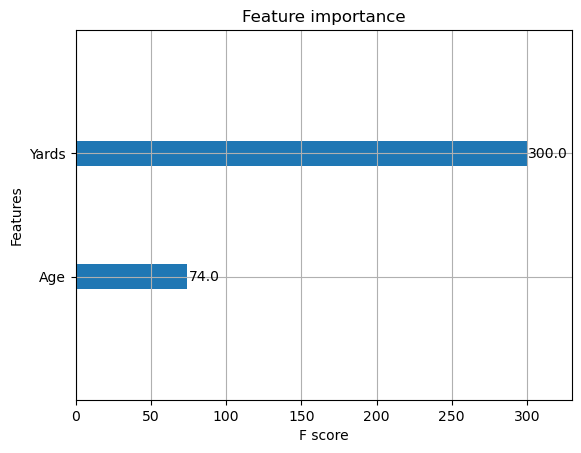

In [6]:
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(model)
plt.show()

# Predict a New Contract

In [16]:
# New WR data: [Yards, TDs, Age, Succ%]
new_player = np.array([[1000, 3, 29,61]])

# Predict contract value
predicted_contract = model.predict(new_player)
print(
    f"\nPredicted contract for 874 yards, 3 TDs, 29 years old, 61 Succ: ${predicted_contract[0]:.1f}M"
)


Predicted contract for 874 yards, 3 TDs, 29 years old, 61 Succ: $22.9M
